In [1]:
from cv_algorithm import model, detect
import cv2
import matplotlib.pyplot as plt
import numpy as np

2024-11-17 21:39:34.952845: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 21:39:35.394694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731872375.571545    1430 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731872375.634377    1430 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 21:39:36.073012: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
model_my = model.load_model('cv_algorithm/model/yolov3.cfg', 'cv_algorithm/model/yolov3_ckpt_600.pth')

/mnt/c/Users/nickk/volleyball_player_detection_app/cv_algorithm/model.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_path, ma

In [3]:
def draw_boxes(img, boxes):
    # Make a copy of the image to draw on
    img_copy = img.copy()

    for box in boxes:
        x1, y1, x2, y2, conf, cls = box
        
        # Convert coordinates to integers
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        
        # Draw rectangle
        color = (0, 255, 0)  # Green color for bounding box
        cv2.rectangle(img_copy, (x1, y1), (x2, y2), color, 2)
        
        # Prepare label text with confidence score
        label = f"player: {conf:.2f}"
        
        # Choose font and text size
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        
        # Calculate text size to create a background for readability
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x, text_y = x1, y1 - 5  # Position above the box
        
        # Draw background rectangle for text
        cv2.rectangle(
            img_copy, 
            (text_x, text_y - text_size[1] - 2), 
            (text_x + text_size[0], text_y + 2), 
            color, 
            -1
        )
        
        # Draw label text on the image
        cv2.putText(
            img_copy, 
            label, 
            (text_x, text_y), 
            font, 
            font_scale, 
            (255, 255, 255),  # White color for text
            font_thickness
        )
    
    return img_copy

In [4]:
def display_image(img_with_boxes):
    plt.figure(figsize=(10, 10))
    plt.imshow(img_with_boxes)
    plt.axis('off')
    plt.show()

In [5]:
img = cv2.imread('test/Brasil_vence_a_França_no_vôlei_masculino_1037987-15.08.2016_ffz-6369.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
boxes = detect.detect_image(model_my, img, conf_thres=0.01, nms_thres=0.1)

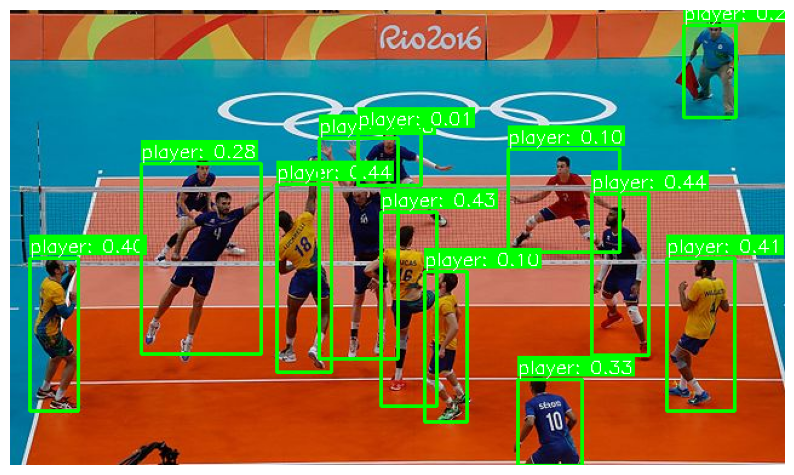

In [8]:
img_with_boxes = draw_boxes(img, boxes)
display_image(img_with_boxes)


In [41]:
img = cv2.imread('test/1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [42]:
boxes = detect.detect_image(model_my, img, conf_thres=0.01, nms_thres=0.1)

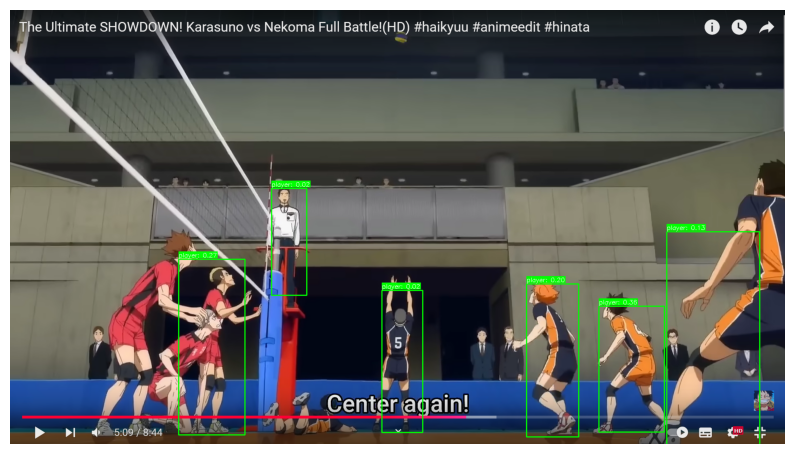

In [43]:
img_with_boxes = draw_boxes(img, boxes)
display_image(img_with_boxes)
